# Introduction

Abi Rahman Sugiri

## Description

### Objective

Engineers utilize mechanical parts that are standardized by certain institutions and manufactured by companies, thus making it accessable for designing machines and machineries. The data science are assigned to a project for assisting engineers by applying machine learning methods to predict mechanical parts, so that efficiency increases in designing and purchasing.

### Problem Statement

Designing robust and accurate machine learning model to predict mechanical parts with accuracy over 90%.

# Data Source

https://www.kaggle.com/datasets/manikantanrnair/images-of-mechanical-parts-boltnut-washerpin

# Importing Libraries

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import os
import glob
import random
import cv2
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
from shutil import copyfile
import splitfolders
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Input

import time
import warnings
warnings.filterwarnings('ignore')

c:\Users\abisu\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\abisu\miniconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\abisu\miniconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Assign Data Directory

In [2]:
# Assign data directory
main_dir='C:/Users/abisu/p2-ftds021-rmt-ml2-abisugiri/blnw-images-224'
os.listdir(main_dir)

['bolt', 'locatingpin', 'nut', 'washer']

# Splitting Data

In [3]:
# splitting data into train, val, test sets
splitfolders.ratio(main_dir, output="splitted", seed=1337, ratio=(.7, 0.15,0.15)) 

Copying files: 0 files [00:00, ? files/s]

Copying files: 7616 files [01:11, 107.24 files/s]


In [4]:
# list of data sets
split_dir = 'C:/Users/abisu/p2-ftds021-rmt-ml2-abisugiri/splitted'
os.listdir(split_dir)

['test', 'train', 'val']

# Exploratory Data Analysis (EDA)

In [5]:
train_dir= os.path.join(split_dir, 'train')
val_dir= os.path.join(split_dir, 'val')
test_dir= os.path.join(split_dir, 'test')
print(train_dir)

C:/Users/abisu/p2-ftds021-rmt-ml2-abisugiri/splitted\train


In [6]:
# Checking data files for each sets
def check_dir(dir=None, labels=None):
  for label in labels:
    num_data= len(os.listdir(os.path.join(dir, label)))
    print(f'Total Files from {label} : {num_data}')

print('train set:')
print('='*40)
check_dir(train_dir, ['bolt', 'locatingpin', 'nut', 'washer'])

print('\nval set:')
print('='*40)
check_dir(val_dir, ['bolt', 'locatingpin', 'nut', 'washer'])

print('\ntest set:')
print('='*40)
check_dir(test_dir, ['bolt', 'locatingpin', 'nut', 'washer'])

print('\nTotal set:')
print('='*40)
check_dir(main_dir, ['bolt', 'locatingpin', 'nut', 'washer'])

train set:
Total Files from bolt : 1332
Total Files from locatingpin : 1332
Total Files from nut : 1332
Total Files from washer : 1332

val set:
Total Files from bolt : 285
Total Files from locatingpin : 285
Total Files from nut : 285
Total Files from washer : 285

test set:
Total Files from bolt : 287
Total Files from locatingpin : 287
Total Files from nut : 287
Total Files from washer : 287

Total set:
Total Files from bolt : 1904
Total Files from locatingpin : 1904
Total Files from nut : 1904
Total Files from washer : 1904


In [7]:
# dividing classes for each sets
train_bolt= glob.glob(train_dir + '/bolt/*.png')
train_locatingpin= glob.glob(train_dir + '/locatingpin/*.png')
train_nut= glob.glob(train_dir + '/nut/*.png')
train_washer= glob.glob(train_dir + '/washer/*.png')

val_bolt= glob.glob(val_dir + '/bolt/*.png')
val_locatingpin= glob.glob(val_dir + '/locatingpin/*.png')
train_nut= glob.glob(val_dir + '/nut/*.png')
val_washer= glob.glob(val_dir + '/washer/*.png')

test_bolt= glob.glob(test_dir + '/bolt/*.png')
test_locatingpin= glob.glob(test_dir + '/locatingpin/*.png')
test_nut= glob.glob(test_dir + '/nut/*.png')
test_washer= glob.glob(test_dir + '/washer/*.png')

In [8]:
# locating pins in train sets
train_locatingpin[:10]

['C:/Users/abisu/p2-ftds021-rmt-ml2-abisugiri/splitted\\train/locatingpin\\AFPDC12-P15_14.png',
 'C:/Users/abisu/p2-ftds021-rmt-ml2-abisugiri/splitted\\train/locatingpin\\AFPDC12-P15_15.png',
 'C:/Users/abisu/p2-ftds021-rmt-ml2-abisugiri/splitted\\train/locatingpin\\AFPDC12-P15_19.png',
 'C:/Users/abisu/p2-ftds021-rmt-ml2-abisugiri/splitted\\train/locatingpin\\AFPDC12-P15_5.png',
 'C:/Users/abisu/p2-ftds021-rmt-ml2-abisugiri/splitted\\train/locatingpin\\AFPDC12-P15_9.png',
 'C:/Users/abisu/p2-ftds021-rmt-ml2-abisugiri/splitted\\train/locatingpin\\AFPDC2-P8_10.png',
 'C:/Users/abisu/p2-ftds021-rmt-ml2-abisugiri/splitted\\train/locatingpin\\AFPDC2-P8_14.png',
 'C:/Users/abisu/p2-ftds021-rmt-ml2-abisugiri/splitted\\train/locatingpin\\AFPDC2-P8_15.png',
 'C:/Users/abisu/p2-ftds021-rmt-ml2-abisugiri/splitted\\train/locatingpin\\AFPDC2-P8_19.png',
 'C:/Users/abisu/p2-ftds021-rmt-ml2-abisugiri/splitted\\train/locatingpin\\AFPDC2-P8_20.png']

In [9]:
# checking image shape
img= plt.imread('C:/Users/abisu/p2-ftds021-rmt-ml2-abisugiri/splitted\\train/locatingpin\\AFPDC12-P15_14.png')
print(img.shape)

(224, 224, 3)


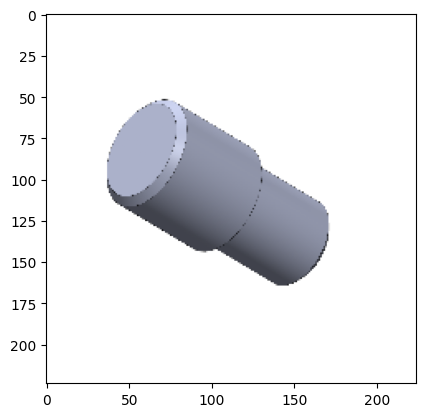

In [10]:
# plot of an image from dataset
plt.imshow(img)

In [11]:
# applying gray scale
gray_img= np.mean(img, axis=2)
print(gray_img.shape)

(224, 224)


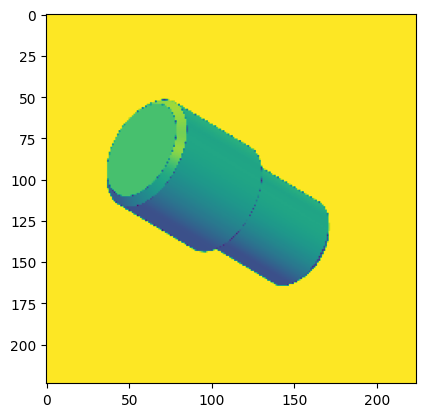

In [12]:
#plot of gray scale image
plt.imshow(gray_img)

In [13]:
train_bolt[:10]

['C:/Users/abisu/p2-ftds021-rmt-ml2-abisugiri/splitted\\train/bolt\\00_09_0101_0100_0400_14.png',
 'C:/Users/abisu/p2-ftds021-rmt-ml2-abisugiri/splitted\\train/bolt\\00_09_0101_0100_0400_15.png',
 'C:/Users/abisu/p2-ftds021-rmt-ml2-abisugiri/splitted\\train/bolt\\00_09_0101_0100_0400_19.png',
 'C:/Users/abisu/p2-ftds021-rmt-ml2-abisugiri/splitted\\train/bolt\\00_09_0101_0100_0400_5.png',
 'C:/Users/abisu/p2-ftds021-rmt-ml2-abisugiri/splitted\\train/bolt\\00_09_0101_0100_0400_9.png',
 'C:/Users/abisu/p2-ftds021-rmt-ml2-abisugiri/splitted\\train/bolt\\00_09_0101_0100_0450_10.png',
 'C:/Users/abisu/p2-ftds021-rmt-ml2-abisugiri/splitted\\train/bolt\\00_09_0101_0100_0450_14.png',
 'C:/Users/abisu/p2-ftds021-rmt-ml2-abisugiri/splitted\\train/bolt\\00_09_0101_0100_0450_15.png',
 'C:/Users/abisu/p2-ftds021-rmt-ml2-abisugiri/splitted\\train/bolt\\00_09_0101_0100_0450_19.png',
 'C:/Users/abisu/p2-ftds021-rmt-ml2-abisugiri/splitted\\train/bolt\\00_09_0101_0100_0450_20.png']

In [14]:
#checking shape of bolt image from train set
img_2= plt.imread('C:/Users/abisu/p2-ftds021-rmt-ml2-abisugiri/splitted\\train/bolt\\00_09_0101_0100_0400_9.png')
print(img_2.shape)

(224, 224, 3)


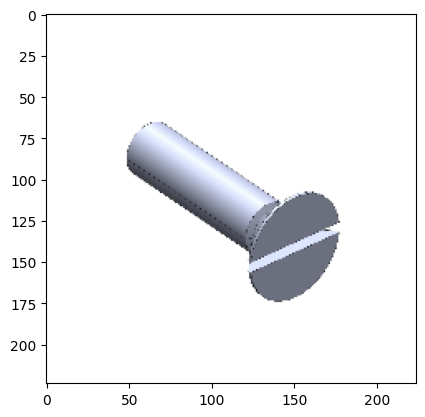

In [15]:
# plot of an image from training set
plt.imshow(img_2)

In [16]:
# gray Scale image
gray_img_2= np.mean(img_2, axis=2)
print(gray_img_2.shape)

(224, 224)


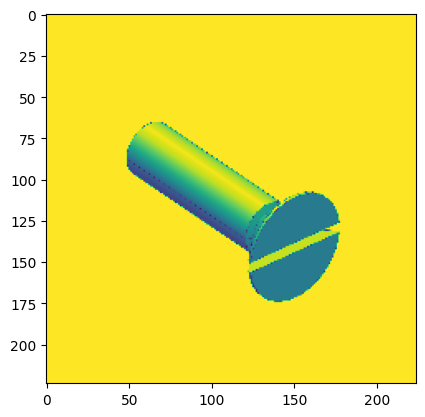

In [17]:
#plot gray scaled image
plt.imshow(gray_img_2)

In [18]:
# random images from a class function
def plot_random_image(target_dir):
    
    target_class=random.choice(os.listdir(target_dir))
    target_folder=os.path.join(target_dir,target_class)
    random_image=random.sample(os.listdir(target_folder),10)
 
    plt.figure(figsize=(16,10))
    for i in range(10):
        
        plt.subplot(1,10,i+1)
        img=tf.io.read_file(os.path.join(target_folder,random_image[i]))
        img=tf.io.decode_image(img)
        plt.imshow(img)
        plt.title(f'{target_class}\n{img.shape}')
        plt.axis(False)

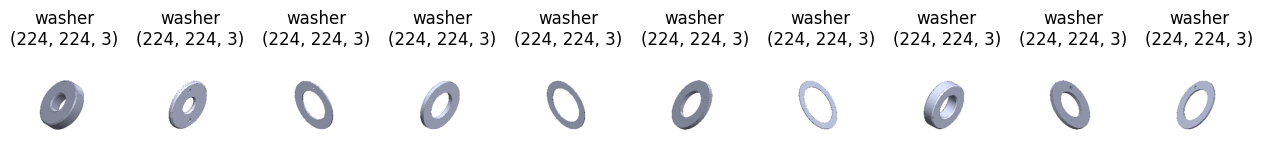

In [19]:
# random images from a class in training set
plot_random_image(train_dir)

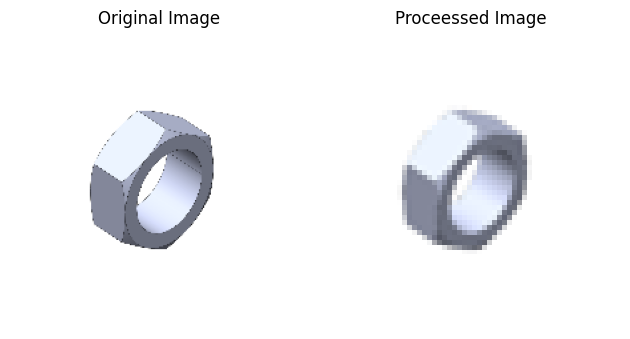

In [20]:
from PIL import Image

# Choose a sample image
sample_image_path = 'C:/Users/abisu/p2-ftds021-rmt-ml2-abisugiri/splitted\\train/nut\\HNS3-SUS-M20_203_19.png'

# Load and show the original image
sample_image = Image.open(sample_image_path)
plt.subplot(1, 2, 1)
plt.imshow(sample_image)
plt.title('Original Image')
plt.axis('off')

# resize and show the image
preprocessed_image = sample_image.resize((60, 60))
plt.subplot(1, 2, 2)
plt.imshow(preprocessed_image)
plt.title('Proceessed Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# Data Preprocessing

In [21]:
# standardize the image
img_h= 224
img_w= 224
batch_size= 64

In [22]:
# preprocessing for each set
train_ds= tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed= 123,
    image_size= (img_h, img_w),
    batch_size= batch_size
)

val_ds= tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    seed= 123,
    image_size= (img_h, img_w),
    batch_size= batch_size,
    shuffle= False
)

test_ds= tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed= 123,
    image_size= (img_h, img_w),
    batch_size= batch_size,
    shuffle= False
)

Found 5328 files belonging to 4 classes.
Found 1140 files belonging to 4 classes.
Found 1148 files belonging to 4 classes.


In [23]:
# class names
print(train_ds.class_names)

['bolt', 'locatingpin', 'nut', 'washer']


In [24]:
#class index
list_class= train_ds.class_names
name_class= 'bolt'
class_index= list_class.index(name_class)
print(class_index)

0


In [25]:
name_class = 'locatingpin'
class_index= list_class.index(name_class)
print(class_index)

1


In [26]:
name_class = 'nut'
class_index= list_class.index(name_class)
print(class_index)

2


In [27]:
name_class = 'washer'
class_index= list_class.index(name_class)
print(class_index)

3


In [28]:
for image, label in train_ds.take(1):
  print('label:', train_ds.class_names[label.numpy()[1]])

label: bolt


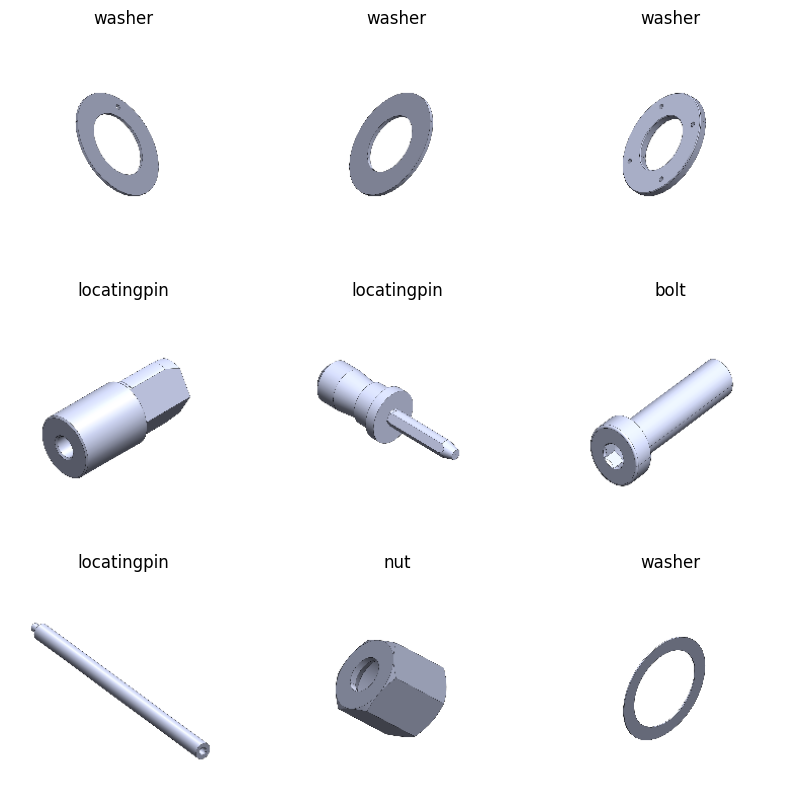

In [30]:
plt.figure(figsize= (10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax= plt.subplot(3,3, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(list_class[labels[i]])
    plt.axis('off')

In [31]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 224, 224, 3)
(64,)


## Data Augmentation

In [61]:
# setting data augmentation parameters
inputs= (224,224, 3)
data_aug= Sequential(
    [
        layers.RandomFlip('horizontal',
                          input_shape=inputs),
        layers.RandomBrightness(factor= 0.3,value_range=[0.0, 255.0]),
        layers.RandomRotation(0.3),
        layers.RandomZoom(0.2)
    ]
)

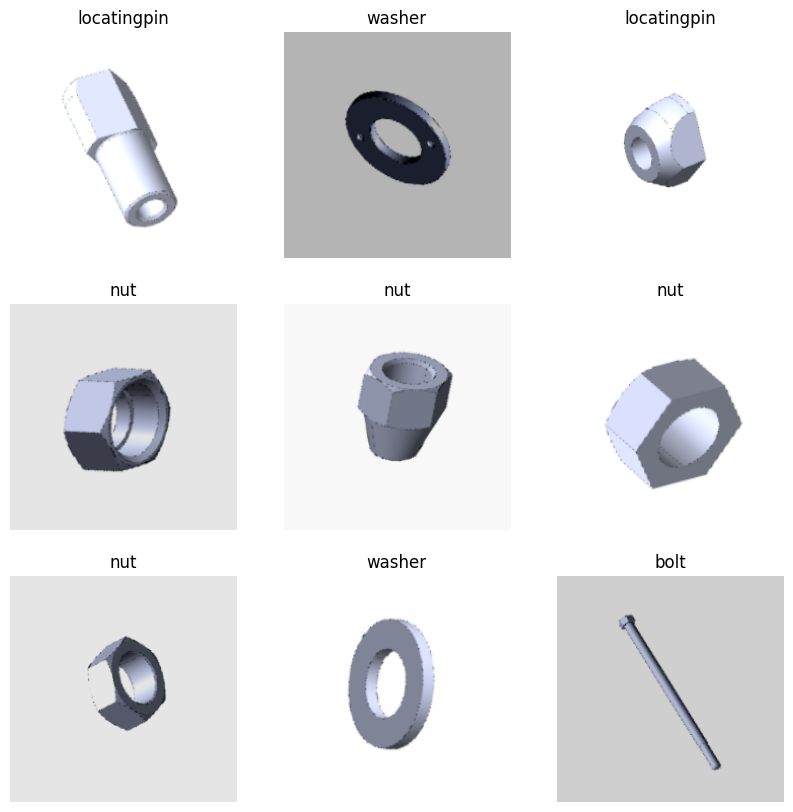

In [62]:
plt.figure(figsize= (10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_img= data_aug(images)
    ax= plt.subplot(3,3, i+1)
    plt.imshow(augmented_img[i].numpy().astype('uint8'))
    plt.title(list_class[labels[i]])
    plt.axis('off')

# First Model

## Model Training

In [63]:
#defining model
model_1= Sequential([
    data_aug,
    layers.Rescaling(1/255, input_shape= inputs),
    layers.Conv2D(16, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(padding='valid'),
    layers.Flatten(),
    layers.Dense(128, activation= 'relu'),
    layers.Dense(64, activation= 'relu'),
    layers.Dense(4, activation= 'softmax'),
    ]
)

In [64]:
#model compiler
model_1.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [65]:
#model summary
model_1.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_13 (Sequential)  (None, 224, 224, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                 

In [66]:
#model training
start_time = time.time()
epochs= 100
history_1= model_1.fit(
    train_ds,
    validation_data= val_ds,
    epochs= epochs
)

print("Process finished --- %s seconds ---" % (time.time() - start_time))

Epoch 1/100
84/84 [==============================] - 333s 4s/step - loss: 1.2902 - accuracy: 0.5268 - val_loss: 0.6398 - val_accuracy: 0.7553
Epoch 2/100
84/84 [==============================] - 336s 4s/step - loss: 0.6865 - accuracy: 0.7369 - val_loss: 0.5519 - val_accuracy: 0.7886
Epoch 3/100
84/84 [==============================] - 307s 4s/step - loss: 0.5947 - accuracy: 0.7650 - val_loss: 0.5348 - val_accuracy: 0.8009
Epoch 4/100
84/84 [==============================] - 179s 2s/step - loss: 0.5839 - accuracy: 0.7648 - val_loss: 0.5236 - val_accuracy: 0.8035
Epoch 5/100
84/84 [==============================] - 332s 4s/step - loss: 0.5517 - accuracy: 0.7782 - val_loss: 0.5001 - val_accuracy: 0.8149
Epoch 6/100
84/84 [==============================] - 346s 4s/step - loss: 0.5207 - accuracy: 0.7909 - val_loss: 0.4432 - val_accuracy: 0.8351
Epoch 7/100
84/84 [==============================] - 373s 4s/step - loss: 0.4912 - accuracy: 0.8039 - val_loss: 0.4082 - val_accuracy: 0.8474
Epoch 

## Model Evaluation

In [69]:
# Create DataFrame

history_seq_df_1 = pd.DataFrame(history_1.history)
history_seq_df_1

,loss,accuracy,val_loss,val_accuracy
0,1.290177,0.526839,0.639830,0.755263
1,0.686484,0.736862,0.551902,0.788597
2,0.594706,0.765015,0.534799,0.800877
3,0.583866,0.764827,0.523556,0.803509
4,0.551723,0.778153,0.500099,0.814912
...,...,...,...,...
95,0.166686,0.942005,0.138251,0.957895
96,0.144017,0.948574,0.160635,0.946491
97,0.140817,0.953453,0.135143,0.950877
98,0.143870,0.952703,0.162807,0.946491


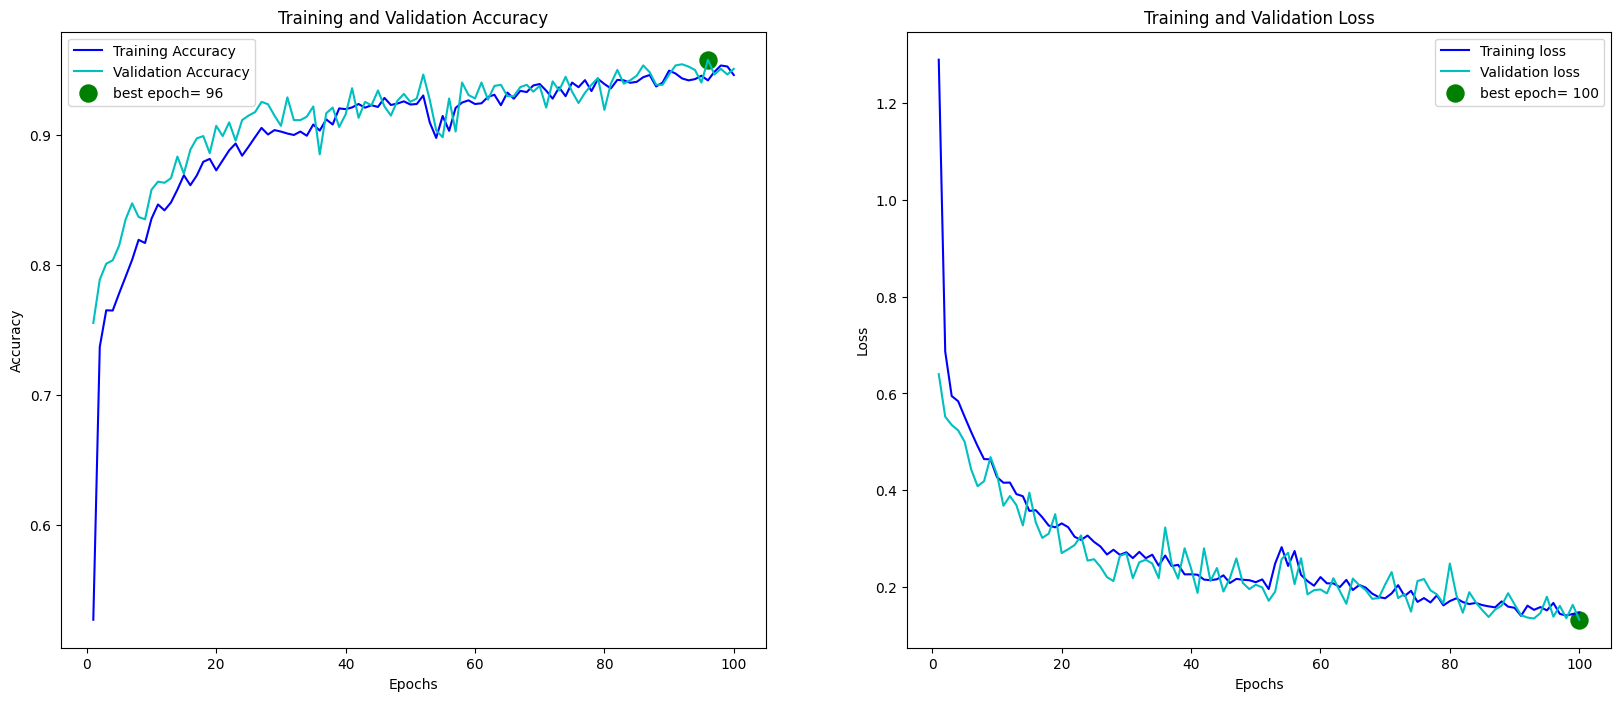

In [68]:
# Define needed variables
train_acc       = history_1.history['accuracy']
train_loss      = history_1.history['loss']
validation_acc  = history_1.history['val_accuracy']
validation_loss = history_1.history['val_loss']

index_loss = np.argmin(validation_loss)
val_lowest = validation_loss[index_loss]
index_acc = np.argmax(validation_acc)
acc_highest = validation_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history

plt.figure(figsize= (20, 8))

plt.subplot(1, 2, 1)
plt.plot(Epochs, train_acc, 'b', label= 'Training Accuracy')
plt.plot(Epochs, validation_acc, 'c', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'green', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, train_loss, 'b', label= 'Training loss')
plt.plot(Epochs, validation_loss, 'c', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'green', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()

In [70]:
# Report score test set
test_result_1= model_1.evaluate(test_ds)
print(f'test loss: {test_result_1[0]}')
print(f'test acc: {test_result_1[1]}')

18/18 [==============================] - 15s 721ms/step - loss: 0.1298 - accuracy: 0.9486
test loss: 0.12979041039943695
test acc: 0.9486062526702881


# Second Model

The second model is trained for comparison to the first model.

## Model Training

In [78]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [79]:
# defining model
model_2= Sequential([
    data_aug,
    layers.Rescaling(1/255, input_shape= inputs),
    layers.Conv2D(16, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(padding='valid'),
    layers.Flatten(),
    layers.Dense(64, activation= 'relu'),
    layers.Dense(32, activation= 'relu'),
    layers.Dropout(0.2),
    layers.Dense(4, activation= 'softmax'),
    ]
)

In [80]:
model_2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [81]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_13 (Sequential)  (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                    

In [82]:
epochs= 150
history_2= model_2.fit(
    train_ds,
    validation_data= val_ds,
    epochs= epochs
)

Epoch 1/150


84/84 [==============================] - 317s 4s/step - loss: 1.4123 - accuracy: 0.4469 - val_loss: 0.8690 - val_accuracy: 0.6825
Epoch 2/150
84/84 [==============================] - 313s 4s/step - loss: 0.8273 - accuracy: 0.6896 - val_loss: 0.6048 - val_accuracy: 0.7667
Epoch 3/150
84/84 [==============================] - 261s 3s/step - loss: 0.7137 - accuracy: 0.7314 - val_loss: 0.5988 - val_accuracy: 0.7781
Epoch 4/150
84/84 [==============================] - 259s 3s/step - loss: 0.6746 - accuracy: 0.7464 - val_loss: 0.5258 - val_accuracy: 0.7886
Epoch 5/150
84/84 [==============================] - 243s 3s/step - loss: 0.6475 - accuracy: 0.7560 - val_loss: 0.5007 - val_accuracy: 0.8053
Epoch 6/150
84/84 [==============================] - 223s 3s/step - loss: 0.5966 - accuracy: 0.7706 - val_loss: 0.4758 - val_accuracy: 0.8263
Epoch 7/150
84/84 [==============================] - 234s 3s/step - loss: 0.5743 - accuracy: 0.7832 - val_loss: 0.4824 - val_accuracy: 0.8079
Epoch 8/150
84/84 

## Model Evaluation

In [83]:
# Create DataFrame

history_seq_df_2 = pd.DataFrame(history_2.history)
history_seq_df_2

,loss,accuracy,val_loss,val_accuracy
0,1.412255,0.446884,0.869041,0.682456
1,0.827311,0.689565,0.604802,0.766667
2,0.713695,0.731419,0.598821,0.778070
3,0.674567,0.746434,0.525787,0.788597
4,0.647456,0.756006,0.500740,0.805263
...,...,...,...,...
145,0.174618,0.938626,0.189075,0.935965
146,0.164613,0.943881,0.185190,0.926316
147,0.190462,0.933746,0.320456,0.891228
148,0.180068,0.937875,0.144755,0.954386


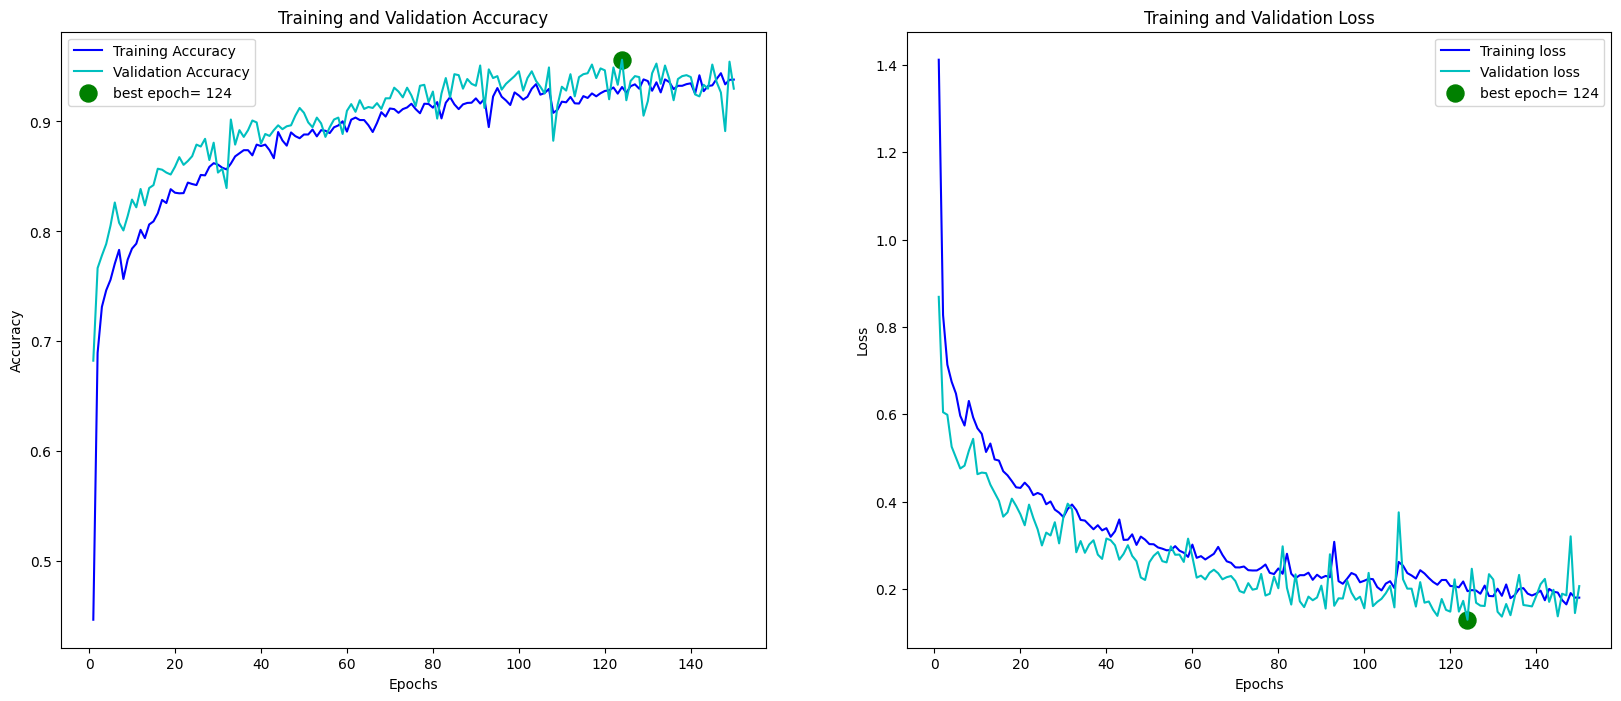

In [84]:
# Define needed variables
train_acc_2       = history_2.history['accuracy']
train_loss_2      = history_2.history['loss']
validation_acc_2  = history_2.history['val_accuracy']
validation_loss_2 = history_2.history['val_loss']

index_loss_2 = np.argmin(validation_loss_2)
val_lowest_2 = validation_loss_2[index_loss_2]
index_acc_2 = np.argmax(validation_acc_2)
acc_highest_2 = validation_acc_2[index_acc_2]

Epochs_2 = [i+1 for i in range(len(train_acc_2))]
loss_label_2 = f'best epoch= {str(index_loss_2 + 1)}'
acc_label_2 = f'best epoch= {str(index_acc_2 + 1)}'

# Plot training history

plt.figure(figsize= (20, 8))

plt.subplot(1, 2, 1)
plt.plot(Epochs_2, train_acc_2, 'b', label= 'Training Accuracy')
plt.plot(Epochs_2, validation_acc_2, 'c', label= 'Validation Accuracy')
plt.scatter(index_acc_2 + 1 , acc_highest_2, s= 150, c= 'green', label= acc_label_2)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs_2, train_loss_2, 'b', label= 'Training loss')
plt.plot(Epochs_2, validation_loss_2, 'c', label= 'Validation loss')
plt.scatter(index_loss_2 + 1, val_lowest_2, s= 150, c= 'green', label= loss_label_2)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()

In [85]:
test_result_2= model_2.evaluate(test_ds)
print(f'test loss: {test_result_2[0]}')
print(f'test acc: {test_result_2[1]}')

18/18 [==============================] - 11s 550ms/step - loss: 0.2251 - accuracy: 0.9260
test loss: 0.22511935234069824
test acc: 0.9259582161903381


# Model Saving

The data science team decided the first model will be saved based on the test results and graphs.

In [86]:
# Model Summary

model_1.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_13 (Sequential)  (None, 224, 224, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                 

In [87]:
# Freeze Model

model_1.trainable = False
model_1.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_13 (Sequential)  (None, 224, 224, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                 

In [88]:
# Save CNN Model

model_1.save('cnn_model.h5')

# Model Inference

Inference model result is on the file 'ah8dsft_P2M2_Model_Inference_abi_sugiri.ipynb'